## Loading the dataset

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
import squarify
from scipy import stats
import scikit_posthocs as sp

In [66]:
df=pd.read_csv('../Database/cleaned_data.csv')
df

,brand,dtime,atime,price,dcity,acity,class_type,ddate,flytime_hours
0,Vietravel Airlines,23:59,02:15,1377000,ho-chi-minh-city,hanoi,economy,2023-12-06,2.266667
1,VietJet Air,22:25,00:35,1447000,ho-chi-minh-city,hanoi,economy,2023-12-06,2.166667
2,VietJet Air,23:30,01:35,1447000,ho-chi-minh-city,hanoi,economy,2023-12-06,2.083333
3,VietJet Air,23:40,01:50,1447000,ho-chi-minh-city,hanoi,economy,2023-12-06,2.166667
4,VietJet Air,21:40,23:50,1563000,ho-chi-minh-city,hanoi,economy,2023-12-06,2.166667
...,...,...,...,...,...,...,...,...,...
53887,VietJet Air,11:25,19:45,6217000,dien-bien-phu,haiphong,economy,2023-12-25,8.333333
53888,VietJet Air,11:25,19:45,10091000,dien-bien-phu,haiphong,economy,2023-12-25,8.333333
53889,VietJet Air,11:25,19:45,10387000,dien-bien-phu,haiphong,economy,2023-12-25,8.333333
53890,VietJet Air,11:25,19:45,10402000,dien-bien-phu,haiphong,economy,2023-12-25,8.333333


# Data analysis

### Feature Engineering

In [39]:
check_columns=['brand','dcity','acity','class_type']
for column in check_columns:
    print(column,': ',df[column].unique(),'\n')

brand :  ['Vietravel Airlines' 'VietJet Air' 'Vietnam Airlines'
 'A.P.G. Distribution System' 'VietJet Air, Vietnam Airlines'
 'Vietnam Airlines, VietJet Air' 'VietJet Air, Vietravel Airlines'
 'Vietnam Airlines, Vietravel Airlines' 'Vietravel Airlines, VietJet Air'
 'Vietravel Airlines, Vietnam Airlines' 'VietJet Air, Pacific Airlines'
 'Pacific Airlines, Vietravel Airlines' 'Pacific Airlines'
 'Vietravel Airlines, Pacific Airlines'
 'Vietnam Airlines, Pacific Airlines' 'Pacific Airlines, Vietnam Airlines'
 'Pacific Airlines, VietJet Air'
 'A.P.G. Distribution System, Vietnam Airlines'] 

dcity :  ['ho-chi-minh-city' 'da-nang' 'hanoi' 'phu-quoc-island' 'nha-trang' 'hue'
 'vinh' 'haiphong' 'dong-hoi' 'chu-lai' 'pleiku' 'buon-ma-thuot' 'ca-mau'
 'con-dao-island' 'Da-lat' 'Can-tho' 'dien-bien-phu' 'rach-gia'] 

acity :  ['hanoi' 'ho-chi-minh-city' 'da-nang' 'phu-quoc-island' 'nha-trang' 'hue'
 'vinh' 'haiphong' 'dong-hoi' 'chu-lai' 'pleiku' 'buon-ma-thuot'
 'con-dao-island' 'Da-lat' 'Can

The 'brand' column in the dataset signifies the airline or airlines associated with a specific flight. When multiple airlines are mentioned, such as 'Vietnam Airlines, VietJet Air', it typically denotes a code-share arrangement. Code-sharing is a prevalent practice in the airline industry where two or more airlines share the same flight.
To further analyze these flights, we create a new column named 'Transit'. Flights involving more than one airline brand will be marked as 1 in this 'Transit' column. This will help in identifying and categorizing flights that are part of a code-share agreement.

In [67]:
def is_transit(brand):
    if ',' in brand:
        return 1
    else:
        return 0
df['Transit'] = df['brand'].apply(is_transit)
df

,brand,dtime,atime,price,dcity,acity,class_type,ddate,flytime_hours,Transit
0,Vietravel Airlines,23:59,02:15,1377000,ho-chi-minh-city,hanoi,economy,2023-12-06,2.266667,0
1,VietJet Air,22:25,00:35,1447000,ho-chi-minh-city,hanoi,economy,2023-12-06,2.166667,0
2,VietJet Air,23:30,01:35,1447000,ho-chi-minh-city,hanoi,economy,2023-12-06,2.083333,0
3,VietJet Air,23:40,01:50,1447000,ho-chi-minh-city,hanoi,economy,2023-12-06,2.166667,0
4,VietJet Air,21:40,23:50,1563000,ho-chi-minh-city,hanoi,economy,2023-12-06,2.166667,0
...,...,...,...,...,...,...,...,...,...,...
53887,VietJet Air,11:25,19:45,6217000,dien-bien-phu,haiphong,economy,2023-12-25,8.333333,0
53888,VietJet Air,11:25,19:45,10091000,dien-bien-phu,haiphong,economy,2023-12-25,8.333333,0
53889,VietJet Air,11:25,19:45,10387000,dien-bien-phu,haiphong,economy,2023-12-25,8.333333,0
53890,VietJet Air,11:25,19:45,10402000,dien-bien-phu,haiphong,economy,2023-12-25,8.333333,0


For the purpose of Exploratory Data Analysis (EDA) and Confirmatory Data Analysis (CDA), two columns named 'dtime_category' and 'a_time category' have been created. These columns categorize time into six distinct ranges, each representing a specific part of the day. 
> From 2h-6h: Early Morning

> From 6h-10h: Morning

> From 10h-14h: Noon

> From 14h-18h: Afternoon

> From 18h-22h: Evening

> From 22h-2h: Late Night


In [69]:
def time_category(hour):
    if 2 <= hour < 6:
        return 'Early Morning'
    elif 6 <= hour < 10:
        return 'Morning'
    elif 10 <= hour < 14:
        return 'Noon'
    elif 14 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 22:
        return 'Evening'
    else:  # from 22h to 2h
        return 'Late Night'
    
df['dtime_category'] = pd.to_datetime(df['dtime']).dt.hour.apply(time_category)
df['atime_category'] = pd.to_datetime(df['atime']).dt.hour.apply(time_category)


C:\Users\2053s\AppData\Local\Temp\ipykernel_3528\963212665.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['dtime_category'] = pd.to_datetime(df['dtime']).dt.hour.apply(time_category)
C:\Users\2053s\AppData\Local\Temp\ipykernel_3528\963212665.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['atime_category'] = pd.to_datetime(df['atime']).dt.hour.apply(time_category)


In [70]:
df['dtime'] = pd.to_datetime(df['dtime'])
df['atime'] = pd.to_datetime(df['atime'])
df['dtime'] = df['dtime'].dt.strftime('%H:%M')
df['atime'] = df['atime'].dt.strftime('%H:%M')
df

C:\Users\2053s\AppData\Local\Temp\ipykernel_3528\2202995652.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['dtime'] = pd.to_datetime(df['dtime'])
C:\Users\2053s\AppData\Local\Temp\ipykernel_3528\2202995652.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['atime'] = pd.to_datetime(df['atime'])


,brand,dtime,atime,price,dcity,acity,class_type,ddate,flytime_hours,Transit,dtime_category,atime_category
0,Vietravel Airlines,23:59,02:15,1377000,ho-chi-minh-city,hanoi,economy,2023-12-06,2.266667,0,Late Night,Early Morning
1,VietJet Air,22:25,00:35,1447000,ho-chi-minh-city,hanoi,economy,2023-12-06,2.166667,0,Late Night,Late Night
2,VietJet Air,23:30,01:35,1447000,ho-chi-minh-city,hanoi,economy,2023-12-06,2.083333,0,Late Night,Late Night
3,VietJet Air,23:40,01:50,1447000,ho-chi-minh-city,hanoi,economy,2023-12-06,2.166667,0,Late Night,Late Night
4,VietJet Air,21:40,23:50,1563000,ho-chi-minh-city,hanoi,economy,2023-12-06,2.166667,0,Evening,Late Night
...,...,...,...,...,...,...,...,...,...,...,...,...
53887,VietJet Air,11:25,19:45,6217000,dien-bien-phu,haiphong,economy,2023-12-25,8.333333,0,Noon,Evening
53888,VietJet Air,11:25,19:45,10091000,dien-bien-phu,haiphong,economy,2023-12-25,8.333333,0,Noon,Evening
53889,VietJet Air,11:25,19:45,10387000,dien-bien-phu,haiphong,economy,2023-12-25,8.333333,0,Noon,Evening
53890,VietJet Air,11:25,19:45,10402000,dien-bien-phu,haiphong,economy,2023-12-25,8.333333,0,Noon,Evening


## Descriptive Statistics

In [25]:
df.describe()

,price,flytime_hours,Transit
count,5.389200e+04,48773.000000,53892.000000
mean,8.960085e+06,7.969977,0.165628
std,8.556210e+06,6.995168,0.371749
min,6.050000e+05,1.083333,0.000000
25%,3.161750e+06,3.666667,0.000000
50%,4.911000e+06,5.583333,0.000000
75%,1.215775e+07,10.833333,0.000000
max,9.985900e+07,52.333333,1.000000


Price: The average price of a ticket is approximately 8.96 million, with a standard deviation of 8.56 million, indicating a wide variation in ticket prices. The minimum price is 605,000, and the maximum is nearly 100 million, which suggests a significant range in ticket pricing, possibly due to different flight routes, class types, or airline services.

Flytime_hours: The average flight duration is around 8 hours, with a standard deviation of approximately 7 hours, indicating that flight durations vary widely, possibly due to different distances or layovers.

Transit: About 16.56% of flights involve a transit, which could affect the price and duration of these flights.

## EDA

### 1. Price distribution

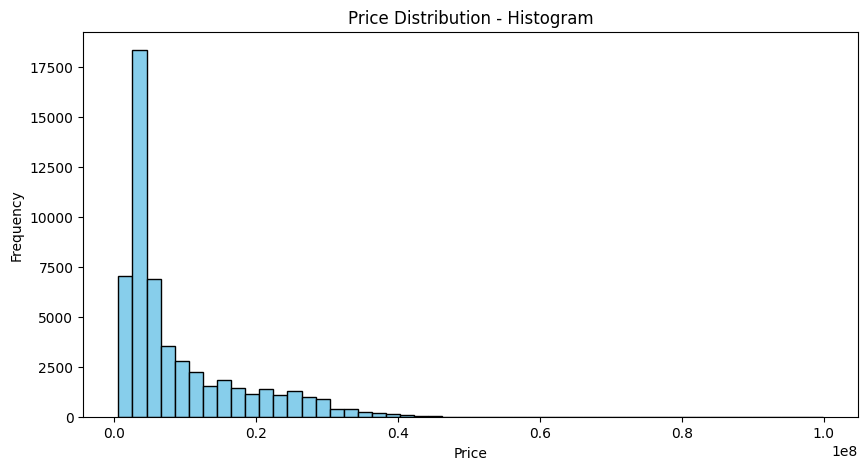

In [24]:
plt.figure(figsize=(10, 5))
plt.hist(df['price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Price Distribution - Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

*Skewed Distribution:* The distribution of prices is right-skewed, meaning there are a higher number of lower-priced tickets and fewer high-priced tickets.

*Price Range:* The majority of ticket prices are clustered at the lower end of the price range, indicating that economy tickets are more common or that there are more promotions and discounts available in this range.

*Outliers:* There may be outliers on the higher end, as indicated by the long tail of the distribution. These could represent business class tickets or flights with special services that are priced significantly higher than the majority of tickets.

*Frequency:* The highest frequency of tickets falls within the lowest price bin, suggesting that this is the most common price point for tickets.

The visualization helps in understanding the pricing strategy of the airline brands, showing that they may be targeting a larger market with more affordable options, while also offering premium options at higher prices.

### 1. The number of flights corresponding to airline brand

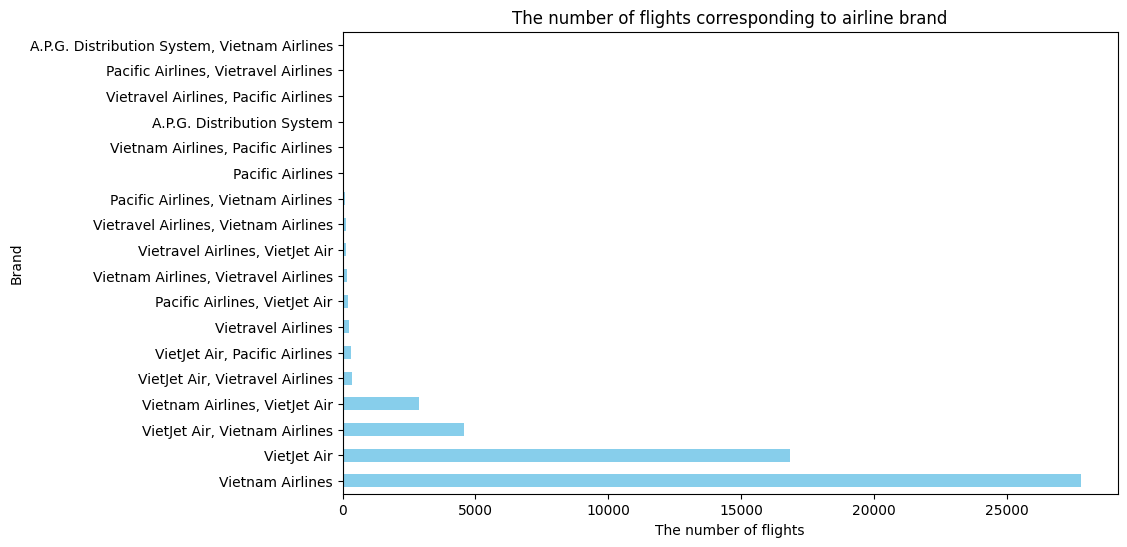

In [32]:
brand_counts = df['brand'].value_counts()

plt.figure(figsize=(10, 6))
brand_counts.plot(kind='barh', color='skyblue')
plt.title('The number of flights corresponding to airline brand')
plt.ylabel('Brand')
plt.xlabel('The number of flights')
plt.show()


>Dominant Airlines: The chart indicates that Vietnam Airlines and VietJet Air have the highest number of flights, with Vietnam Airlines showing a particularly large number of flights compared to other brands.

>Transit Flights (Code-share flights): There are several entries in the chart that represent transit flights involving multiple airlines, such as "VietJet Air, Vietnam Airlines". These entries are less frequent than the individual airline entries but still significant enough to be noted.

>Less Frequent Airlines: Some airlines, such as Pacific Airlines and A.P.G. Distribution System, have a smaller number of flights, as indicated by the shorter bars on the chart.

The visualization shows the market share of each airline in terms of flight frequency. It also highlights the complexity of partnerships in the aviation industry, as seen in the code-share flights.

### 2. The number of flights departs from a city/ arrives to a city

**Arrival graphs**

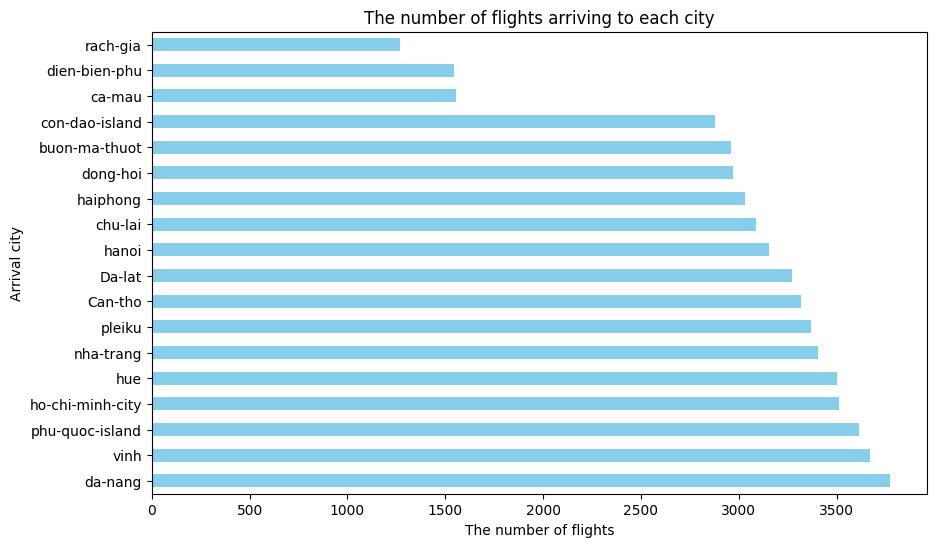

In [35]:
arrival_counts = df['acity'].value_counts()
plt.figure(figsize=(10, 6))
arrival_counts.plot(kind='barh', color='skyblue')
plt.title('The number of flights arriving to each city')
plt.ylabel('Arrival city')
plt.xlabel('The number of flights')
plt.show()


> High Traffic Cities: Cities like Da Nang, Vinh, and Phu Quoc Island have the highest number of arriving flights, indicating they are key destinations with significant air traffic.

> Tourism and Business Hubs: These cities may be popular tourist destinations or important business centers, which could explain the high volume of incoming flights.

> Airport Capacity: The number of flights also reflects the capacity and connectivity of the airports in these cities.


**Departure graph**

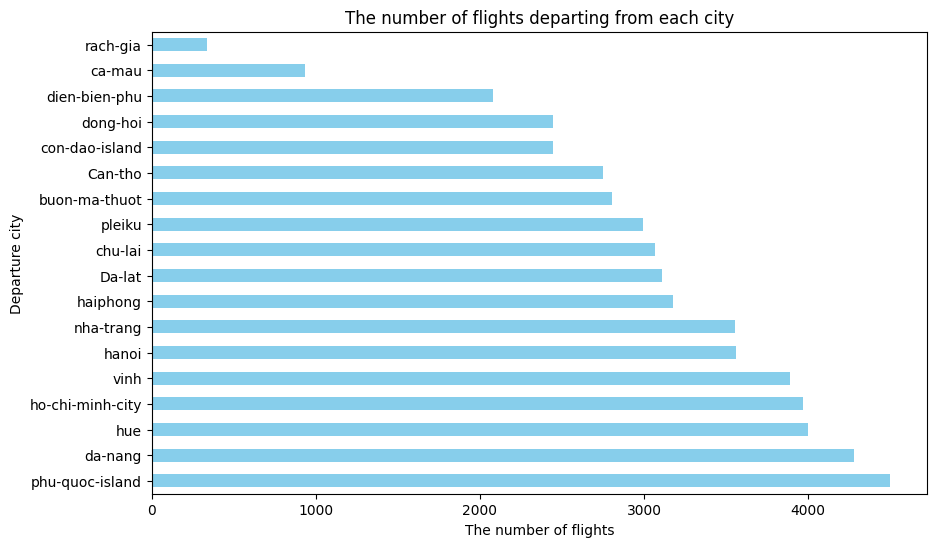

In [34]:
departure_counts = df['dcity'].value_counts()
plt.figure(figsize=(10, 6))
departure_counts.plot(kind='barh', color='skyblue')
plt.title('The number of flights departing from each city')
plt.ylabel('Departure city')
plt.xlabel('The number of flights')
plt.show()


> Major Departure Points: Similar to the arrivals graph, cities like Phu Quoc Island, Da Nang, and Vinh show a high number of departures, suggesting they are not only destinations but also major points of origin for flights.

> Balanced Traffic: There seems to be a balance between the number of flights arriving and departing from these cities, which is typical for busy airports with good turnaround times.

### 3. The number of flights for each route.

C:\Users\2053s\AppData\Local\Temp\ipykernel_3528\988221055.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_routes['route'] = top_routes['dcity'] + ' -> ' + top_routes['acity']
C:\Users\2053s\AppData\Local\Temp\ipykernel_3528\988221055.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='flight_count', y='route', data=top_routes, palette='viridis')


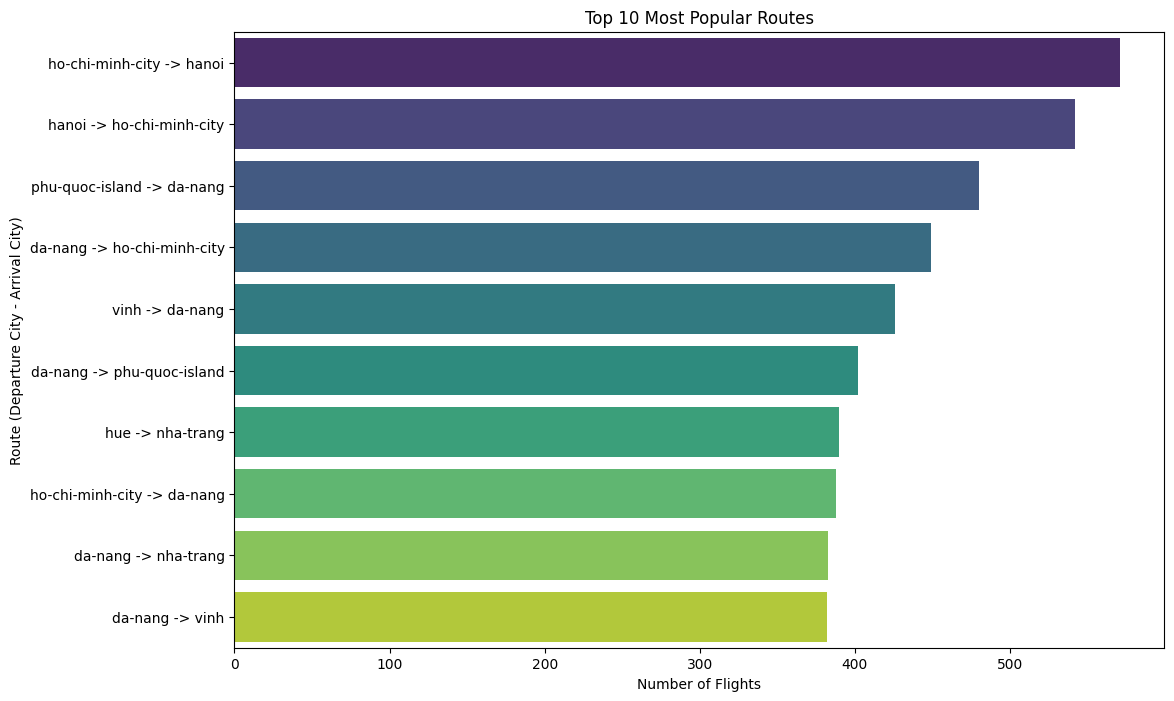

In [36]:
route_counts = df.groupby(['dcity', 'acity']).size().reset_index(name='flight_count')
route_counts = route_counts.sort_values(by='flight_count', ascending=False)

#Top 10 most popular route
top_routes = route_counts.head(10)

#create a new column called route for a pair dcity-acity
top_routes['route'] = top_routes['dcity'] + ' -> ' + top_routes['acity']

#plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='flight_count', y='route', data=top_routes, palette='viridis')
plt.title('Top 10 Most Popular Routes')
plt.xlabel('Number of Flights')
plt.ylabel('Route (Departure City - Arrival City)')
plt.show()


>High Traffic Routes: The route between Ho Chi Minh City and Hanoi has the highest number of flights, indicating it is the most popular and possibly the busiest air travel route.

>Tourist Destinations: Routes involving Phu Quoc Island, Da Nang, and Nha Trang, which are known tourist destinations, also show a high number of flights, suggesting strong tourism demand.

>Economic Centers: The popularity of routes to and from Ho Chi Minh City and Hanoi, which are major economic centers, may reflect significant business travel alongside tourism.

>Regional Connectivity: The presence of multiple routes within central Vietnam, such as those involving Da Nang, Hue, and Nha Trang, highlights strong regional connectivity.

>Route Planning: Airlines may use this information for route planning, increasing flight frequencies on popular routes, or considering additional services to meet high demand.

>Infrastructure and Services: Airport authorities might leverage this data to manage airport infrastructure and services better, ensuring they can handle peak traffic efficiently.

### 5. The number of flights departs at a time period/ arrives at a time period

categories = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night']
time_ranges = [(0, 4), (4, 8), (8, 12), (12, 16), (16, 20), (20, 24)]

In the **feature engineer** part, we have created 2 column that put time in categories for EDA purpose. 
> From 2h-6h: Early Morning

> From 6h-10h: Morning

> From 10h-14h: Noon

> From 14h-18h: Afternoon

> From 18h-22h: Evening

> From 22h-2h: Late Night

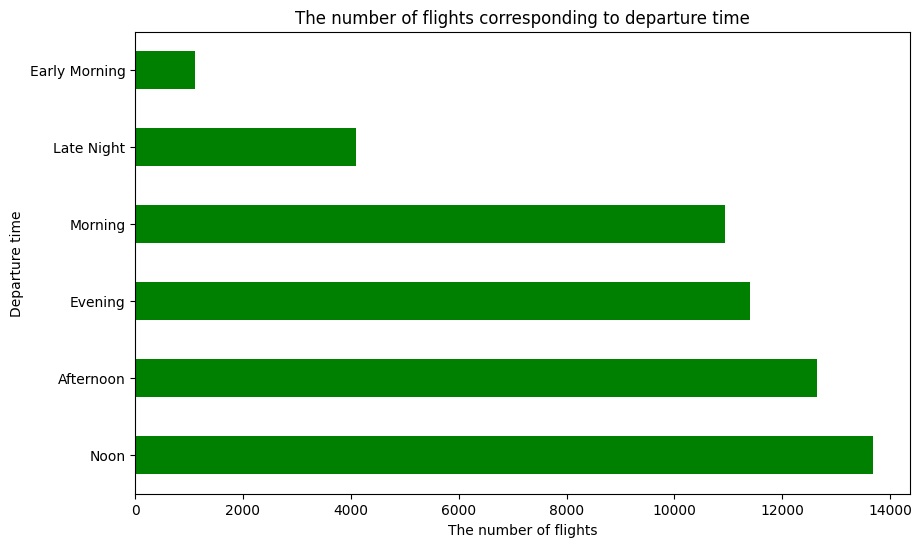

In [73]:
dtime_category_counts = df['dtime_category'].value_counts()
plt.figure(figsize=(10, 6))
dtime_category_counts.plot(kind='barh', color='green')
plt.title('The number of flights corresponding to departure time')
plt.ylabel('Departure time')
plt.xlabel('The number of flights')
plt.show()


The graph shows that the most flights depart during the 'Afternoon' and 'Noon' time categories, indicating peak travel times.
'Early Morning' and 'Late Night' have fewer flights, which may suggest less demand or airport operational constraints during these hours.
The 'Morning' and 'Evening' categories have moderate numbers of flights, which could indicate steady travel demand throughout the day.

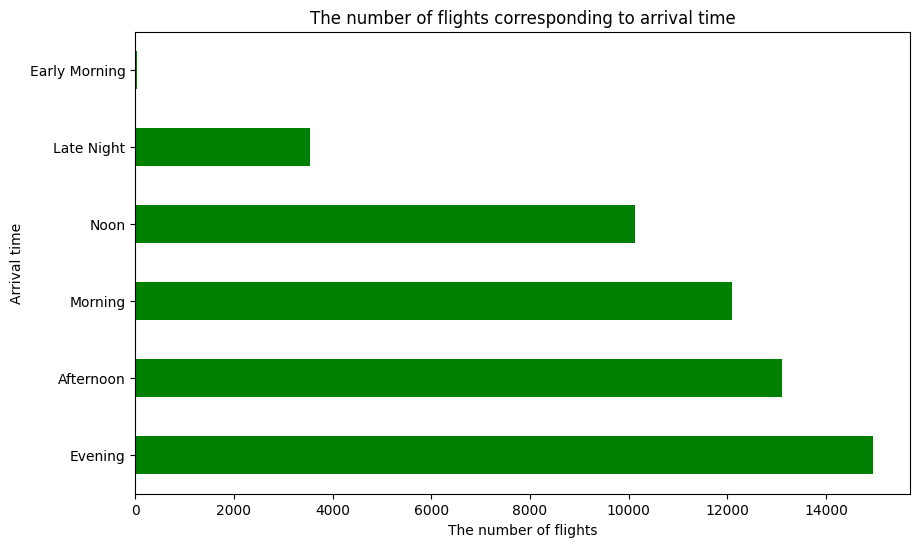

In [75]:
atime_category_counts = df['atime_category'].value_counts()

plt.figure(figsize=(10, 6))
atime_category_counts.plot(kind='barh', color='green')
plt.title('The number of flights corresponding to arrival time')
plt.ylabel('Arrival time')
plt.xlabel('The number of flights')
plt.show()


The chart illustrates:

> Evening: Has the highest number of flights arriving, with the bar reaching close to 16,000 flights.

> Afternoon: The second highest, with slightly fewer flights than the Evening.

> Morning: Shows a moderate number of flights arriving.

> Noon: Has fewer flights compared to Morning.

> Late Night: Has a relatively low number of flights.

> Early Morning: Has the least number of flights arriving.


From these charts, we can deduce that the busiest times for flights arriving at the airport are in the Evening, while the busiest times for flights departing are around Noon. Conversely, the Early Morning is the least busy time for both arrivals and departures. This information is crutial because there are peak times and off-peak times during the day. Airlines might charge higher prices during these peak times due to increased demand. Conversely, airlines may offer lower ticket prices to encourage travel during these less busy times.

### 6. Correlation of Flight Duration with Ticket Pricing

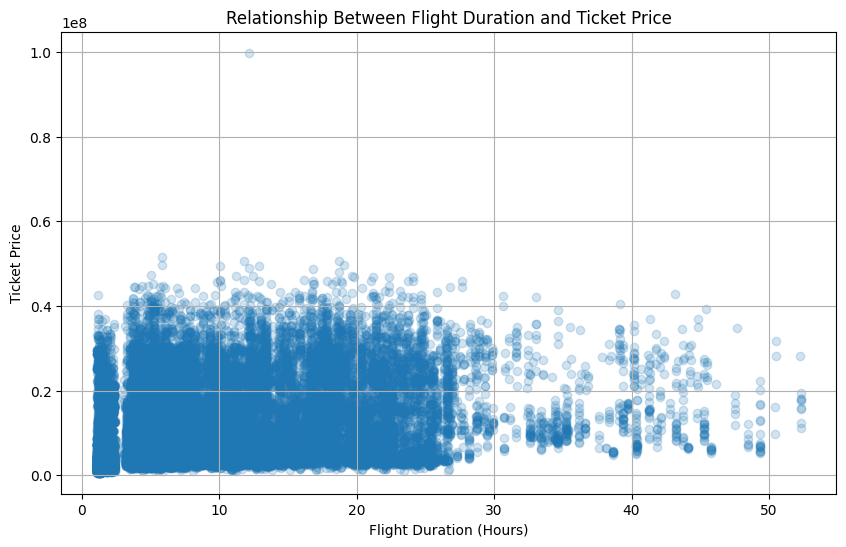

In [82]:
plt.figure(figsize=(10, 6))
plt.scatter(df['flytime_hours'], df['price'], alpha=0.2)
plt.title('Relationship Between Flight Duration and Ticket Price')
plt.xlabel('Flight Duration (Hours)')
plt.ylabel('Ticket Price')
plt.grid(True)
plt.show()

From the chart, we can observe that there is a dense cluster of points, indicating that many flights have similar durations and prices. There are also some points spread out above the main cluster, which could represent flights that are more expensive than the majority at similar durations. Most of the data points are clustered at the lower end of the flight duration axis, indicating that shorter flights are more common in the dataset. The scatter plot does not show a clear linear trend between flight duration and ticket price, implying that the relationship is not straightforward and may be affected by multiple variables.

While flight duration often correlates with ticket price, as longer flights typically cover greater distances and may incur higher costs, this relationship is not absolute. For instance, direct flights covering long distances may be priced differently compared to transit flights of similar duration. Transit flights can have extended durations due to layovers, which might not necessarily translate to a higher ticket price. Therefore, while flight duration is a factor in pricing, it is one of many variables that airlines consider when setting fares.

### 7. The diffence in price range between different class type. 

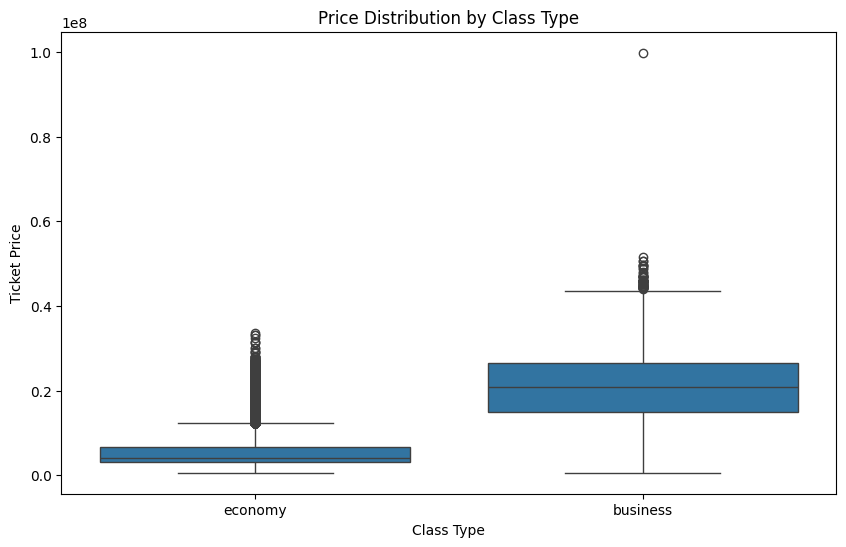

In [90]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='class_type', y='price', data=df)
plt.title('Price Distribution by Class Type')
plt.xlabel('Class Type')
plt.ylabel('Ticket Price')
plt.show()

The graph shows a clear distinction between the ticket prices for economy and business class types.
> Business class tickets have a higher median price and a wider range of prices, indicating more variability and generally higher costs.

> Economy class tickets have a lower median price and a more compact interquartile range, suggesting less variability and more affordability.

### 7. The average price corresponding to popular routes

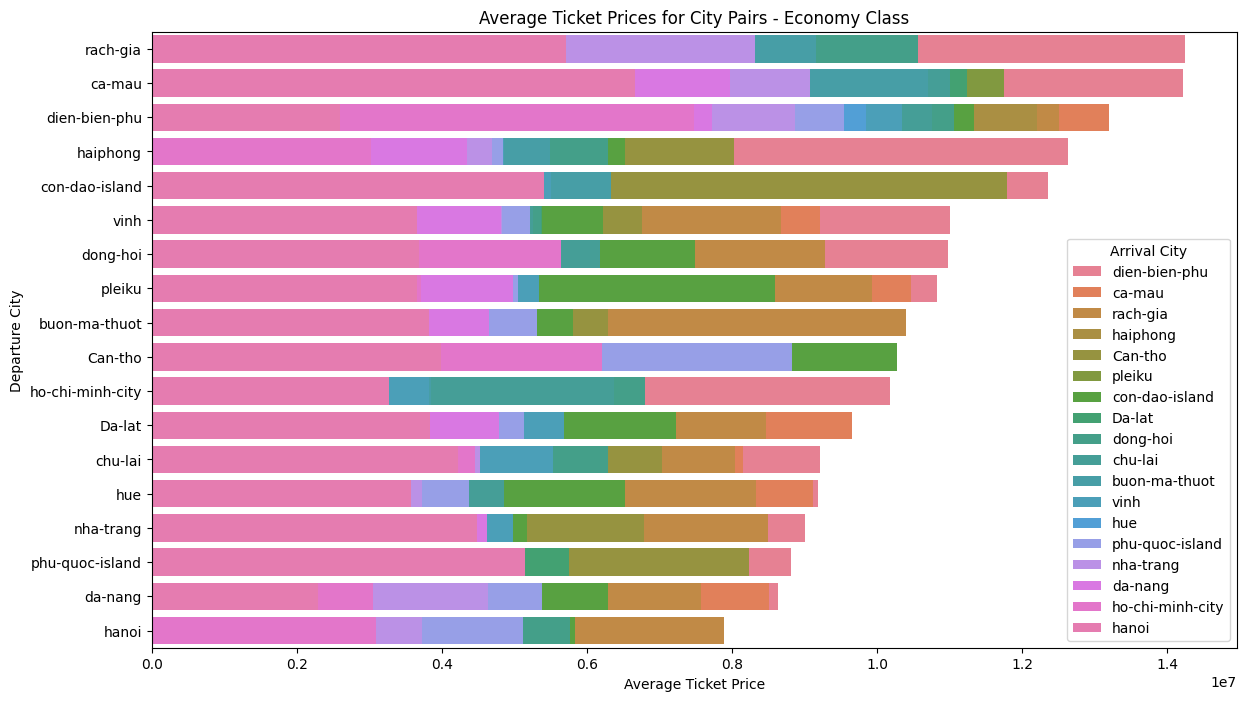

In [97]:
avg_prices_economy = df[df['class_type']=='economy'].groupby(['dcity', 'acity'])['price'].mean().reset_index()
avg_prices_economy = avg_prices_economy.sort_values('price', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x='price', y='dcity', data=avg_prices_economy, hue='acity', dodge=False)
plt.title('Average Ticket Prices for City Pairs - Economy Class')
plt.xlabel('Average Ticket Price')
plt.ylabel('Departure City')
plt.legend(title='Arrival City')
plt.show()

This stacked bar chart illustrates the average ticket prices for flights departing from various cities in economy class. Each bar represents a different departure city, and the colored segments within the bars indicate the average prices for flights to different arrival cities. The length of each colored segment reflects the average price for that specific city pair, allowing for a comparison of ticket costs across different routes. For example, flights from Hanoi show a range of average prices to various destinations, with each destination represented by a different color. This visualization helps to identify which city pairs have higher or lower average ticket prices, providing insights into the pricing structure of flights between these cities.

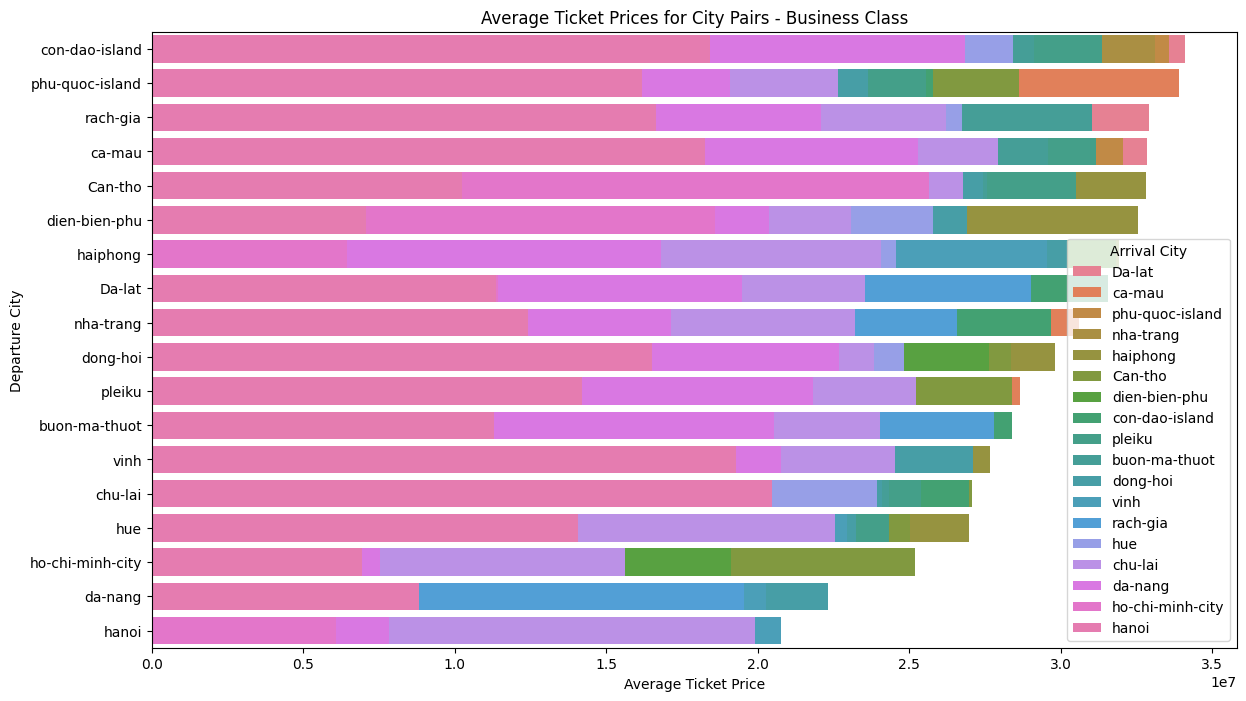

In [98]:
avg_prices_business = df[df['class_type']=='business'].groupby(['dcity', 'acity'])['price'].mean().reset_index()
avg_prices_business = avg_prices_business.sort_values('price', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x='price', y='dcity', data=avg_prices_business, hue='acity', dodge=False)
plt.title('Average Ticket Prices for City Pairs - Business Class')
plt.xlabel('Average Ticket Price')
plt.ylabel('Departure City')
plt.legend(title='Arrival City')
plt.show()

Similar to the graph above but this one illustrates the average ticket price for business class flights between different city pairs.

## CDA


After having done the data visualization for the dataset in EDA part, we have made some hypothesises (or assumptions) about the dataset.

### **Hypothesis 1: The brand do affect the price**

Since the dataset we're working with including of both transit and nontransit flights, transit flights involve more than 1 airline brand so we can't compare the average price between different brand. 

That is the reason why we only work with nontransit flights in the process of proving this hypothesis.

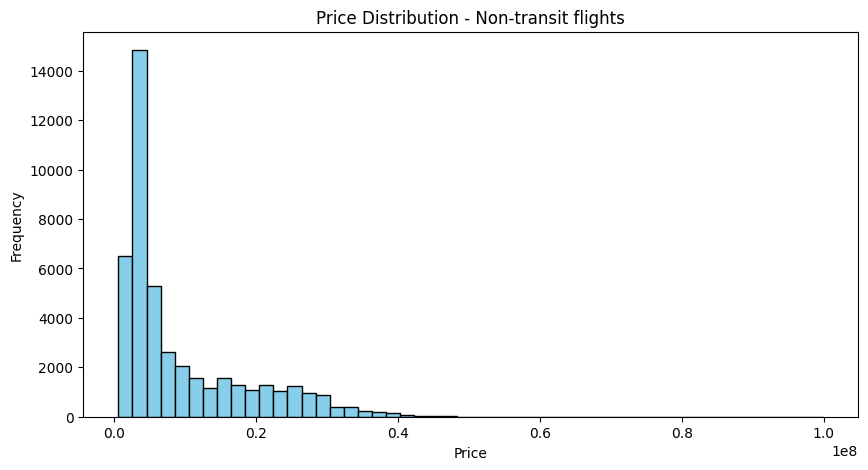

In [103]:
non_transit_df = df[df['Transit'] == 0]
"""vn_airlines=non_transit_df[non_transit_df['brand']=='Vietnam Airlines']['price']
vj_airlines=non_transit_df[non_transit_df['brand']=='VietJet Air']['price']
vt_airlines=non_transit_df[non_transit_df['brand']=='Vietravel Airlines']['price']
pcf_airlines=non_transit_df[non_transit_df['brand']=='Pacific Airlines']['price']"""

plt.figure(figsize=(10, 5))
plt.hist(non_transit_df['price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Price Distribution - Non-transit flights')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [105]:
for brand in non_transit_df['brand'].unique():
    prices = non_transit_df[non_transit_df['brand'] == brand]['price']
    stat, p_value = stats.shapiro(prices)
    print(f"Brand: {brand}")
    print(f"Number of data: {len(non_transit_df[non_transit_df['brand']==brand])}")
    print(f"Statistics={stat}, p-value={p_value}")
    if p_value > 0.05:
        print(brand + " follows a normal distribution\n")
    else:
        print(brand+" does not follow a normal distribution\n")



Brand: Vietravel Airlines
Number of data: 236
Statistics=0.6491532325744629, p-value=8.853100434756598e-22
Vietravel Airlines does not follow a normal distribution

Brand: VietJet Air
Number of data: 16840
Statistics=0.7447052597999573, p-value=0.0
VietJet Air does not follow a normal distribution

Brand: Vietnam Airlines
Number of data: 27773
Statistics=0.8750981688499451, p-value=0.0
Vietnam Airlines does not follow a normal distribution

Brand: A.P.G. Distribution System
Number of data: 44
Statistics=0.8747586011886597, p-value=0.00019899463222827762
A.P.G. Distribution System does not follow a normal distribution

Brand: Pacific Airlines
Number of data: 73
Statistics=0.7512467503547668, p-value=8.603707191134902e-10
Pacific Airlines does not follow a normal distribution



c:\Users\2053s\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Since p-value may not be accurate for N > 5000, we make distribution graphs for the 2 brand: Vietnam Airlines and VietJet Air. 

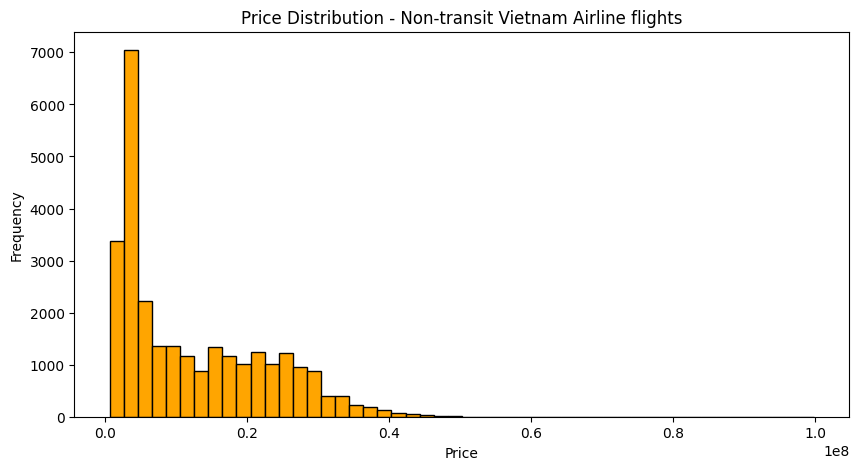

In [119]:
plt.figure(figsize=(10, 5))
plt.hist(non_transit_df[non_transit_df['brand']=='Vietnam Airlines']['price'], bins=50, color='orange', edgecolor='black')
plt.title('Price Distribution - Non-transit Vietnam Airline flights')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

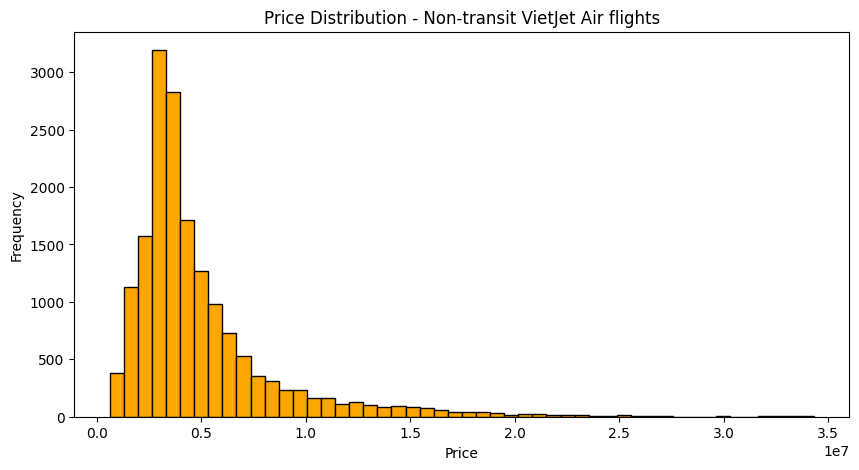

In [120]:
plt.figure(figsize=(10, 5))
plt.hist(non_transit_df[non_transit_df['brand']=='VietJet Air']['price'], bins=50, color='orange', edgecolor='black')
plt.title('Price Distribution - Non-transit VietJet Air flights')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Based on the histograms and the statistical test results provided, it is evident that the price distributions for both Vietnam Airlines and VietJet Air do not follow a normal distribution.

Since the normality assumption is not met, to continue testing the hypothesis, we should use non-parametric test approaches. In this case, we are comparing more than two independent samples (prices from multiple airlines), the Kruskal-Wallis H test is selected.

In [110]:
prices_vietravel = non_transit_df[non_transit_df['brand']=='Vietravel Airlines']['price']  
prices_vietjet = non_transit_df[non_transit_df['brand']=='VietJet Air']['price']  
prices_vna = non_transit_df[non_transit_df['brand']=='Vietnam Airlines']['price']    
prices_apg = non_transit_df[non_transit_df['brand']=='A.P.G. Distribution System']['price']    
prices_pacific = non_transit_df[non_transit_df['brand']=='Pacific Airlines']['price']  

#perform the Kruskal-Wallis H test
h_statistic, p_value = stats.kruskal(prices_vietravel, prices_vietjet, prices_vna, prices_apg, prices_pacific)

print('H Statistic:', h_statistic)
print('P-value:', p_value)

H Statistic: 5032.86163272887
P-value: 0.0


A high H statistic and a p-value of 0.0 indicate that there is a statistically significant difference in the price distributions across the five airline brands. This means that the prices for at least one of the airline brands are significantly different from the others. However, the test does not tell which specific groups (airline brands) differ from each other. To determine this, we decided to conduct post-hoc pairwise comparisons using Dunn's test, while adjusting for multiple comparisons to maintain the overall type I error rate.

In [113]:
prices = np.concatenate([prices_vietravel, prices_vietjet, prices_vna, prices_apg, prices_pacific])
groups = np.concatenate([np.repeat('Vietravel', len(prices_vietravel)),
                         np.repeat('VietJet', len(prices_vietjet)),
                         np.repeat('Vietnam Airlines', len(prices_vna)),
                         np.repeat('APG', len(prices_apg)),
                         np.repeat('Pacific', len(prices_pacific))])

p_values = sp.posthoc_dunn([prices_vietravel, prices_vietjet, prices_vna, prices_apg, prices_pacific], p_adjust='bonferroni')

print(p_values)

               1             2              3             4             5
1   1.000000e+00  4.954121e-42  1.675939e-125  3.666452e-19  3.501159e-07
2   4.954121e-42  1.000000e+00   0.000000e+00  5.494962e-04  1.000000e+00
3  1.675939e-125  0.000000e+00   1.000000e+00  1.000000e+00  1.871226e-11
4   3.666452e-19  5.494962e-04   1.000000e+00  1.000000e+00  5.258080e-04
5   3.501159e-07  1.000000e+00   1.871226e-11  5.258080e-04  1.000000e+00


In [117]:
brand_names = ['Vietravel', 'VietJet', 'VN Airlines', 'A.P.G.', 'Pacific']
p_values_matrix = [
    [1.000000e+00, 4.954121e-42, 1.675939e-125, 3.666452e-19, 3.501159e-07],
    [4.954121e-42, 1.000000e+00, 0.000000e+00, 5.494962e-04, 1.000000e+00],
    [1.675939e-125, 0.000000e+00, 1.000000e+00, 1.000000e+00, 1.871226e-11],
    [3.666452e-19, 5.494962e-04, 1.000000e+00, 1.000000e+00, 5.258080e-04],
    [3.501159e-07, 1.000000e+00, 1.871226e-11, 5.258080e-04, 1.000000e+00]
]
p_values_df = pd.DataFrame(p_values_matrix, index=brand_names, columns=brand_names)
print(p_values_df)

                 Vietravel       VietJet    VN Airlines        A.P.G.  \
Vietravel     1.000000e+00  4.954121e-42  1.675939e-125  3.666452e-19   
VietJet       4.954121e-42  1.000000e+00   0.000000e+00  5.494962e-04   
VN Airlines  1.675939e-125  0.000000e+00   1.000000e+00  1.000000e+00   
A.P.G.        3.666452e-19  5.494962e-04   1.000000e+00  1.000000e+00   
Pacific       3.501159e-07  1.000000e+00   1.871226e-11  5.258080e-04   

                  Pacific  
Vietravel    3.501159e-07  
VietJet      1.000000e+00  
VN Airlines  1.871226e-11  
A.P.G.       5.258080e-04  
Pacific      1.000000e+00  


The p-values in the matrix indicate whether the difference in price distributions between any two brands is statistically significant. A very small p-value (close to zero) suggests a significant difference in prices between those two brands. 

> Brands Vietravel and VietJet (p-value = 4.954121e-42), brands Vietravel and VN Airlines (p-value = 1.675939e-125), and brands Vietravel and Pacific (p-value = 3.666452e-19) have significantly different prices.

> Brands VietJet and Vietnam Airlines (p-value = 0.000000e+00) also show a significant difference in prices.

> Brands A.P.G and Pacific (p-value = 5.258080e-04) have a significant difference in prices.

> The p-values that are 1.000000e+00 or very close to 1 indicate no statistically significant difference in prices between those pairs of brands.

The Dunn's test results only tell us that there are significant differences, not which brand is more expensive or cheaper. To determine that, we look at the median or mean prices for each brand.

In [118]:
median_prices = non_transit_df.groupby('brand')['price'].median()
mean_prices = non_transit_df.groupby('brand')['price'].mean()

print("Median Prices:")
print(median_prices)
print("\nMean Prices:")
print(mean_prices)

Median Prices:
brand
A.P.G. Distribution System    6549000.0
Pacific Airlines              3297000.0
VietJet Air                   3783500.0
Vietnam Airlines              8322000.0
Vietravel Airlines            1587500.0
Name: price, dtype: float64

Mean Prices:
brand
A.P.G. Distribution System    7.880932e+06
Pacific Airlines              4.187986e+06
VietJet Air                   4.949474e+06
Vietnam Airlines              1.219138e+07
Vietravel Airlines            2.238182e+06
Name: price, dtype: float64


> Vietnam Airlines has the highest median and mean prices among the brands listed, suggesting it is generally the most expensive option for non-transit flights.

> Vietravel Airlines has the lowest median and mean prices, indicating it is the cheapest option among the brands listed.

> A.P.G. Distribution System and VietJet Air have median and mean prices that are in the middle range, with A.P.G. Distribution System being slightly more expensive on average than VietJet Air.

> Pacific Airlines has a median price that is lower than A.P.G. Distribution System and VietJet Air but higher than Vietravel Airlines. Its mean price is closer to that of VietJet Air.

### **Hypothesis 2: Popular route may affect the price**

Since checking for normality for the distribution of flights corresponding to multiple routes may take a lot of time and unneccessary, we decided to use non-parametric tests (Mann-Whitney U), which do not assume normality. In the process of testing the hypothesis, we only work with economy class type price. 

In [124]:
df['route'] = df['dcity'] + '-' + df['acity']
economy_df=df[df['class_type']=='economy']

route_prices = economy_df.groupby('route')['price'].median().reset_index(name='median_price')

#calculate flight counts for each route and reset the index to make it a DataFrame
route_counts = economy_df['route'].value_counts().reset_index(name='flight_count')
route_counts.rename(columns={'index': 'route'}, inplace=True)

#merge the DataFrames on the 'route' column
route_stats = pd.merge(route_prices, route_counts, on='route')

popularity_threshold = route_stats['flight_count'].quantile(0.75)
route_stats['popularity'] = route_stats['flight_count'] >= popularity_threshold

#compare prices by popularity
popular_routes = route_stats[route_stats['popularity'] == True]
less_popular_routes = route_stats[route_stats['popularity'] == False]

from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(popular_routes['median_price'], less_popular_routes['median_price'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

#results
if p < 0.05:
    print("There is a statistically significant difference in prices between popular and less popular routes.")
else:
    print("There is no statistically significant difference in prices between popular and less popular routes.")

Statistics=4095.000, p=0.000
There is a statistically significant difference in prices between popular and less popular routes.


In [127]:
economy_df = economy_df.merge(route_stats[['route', 'popularity']], on='route', how='left')
popular_median_price = economy_df[economy_df['popularity'] == True]['price'].median()
less_popular_median_price = economy_df[economy_df['popularity'] == False]['price'].median()

#compare
if popular_median_price < less_popular_median_price:
    print(f"Popular routes are cheaper with a median price of {popular_median_price} compared to {less_popular_median_price} for less popular routes.")
elif popular_median_price > less_popular_median_price:
    print(f"Popular routes are more expensive with a median price of {popular_median_price} compared to {less_popular_median_price} for less popular routes.")
else:
    print("There is no difference in median prices between popular and less popular routes.")

Popular routes are cheaper with a median price of 3652000.0 compared to 4536000.0 for less popular routes.


We can make a conclusion that a certain route do affect the price. Popular routes are cheaper and less popular routes are much more expensive in price.